In [1]:
# Essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge

# Scoring
from sklearn.metrics import mean_squared_error

# Presentation
import datetime

### Data cleaning

In [2]:
class ModelData():
    def __init__(self):
        ## Import Raw Datasets
        self.data = pd.read_csv('./datasets/train.csv')
        self.data_raw = self.data.copy()
        self.testing_data = pd.read_csv('./datasets/test.csv')
        
        ## Clean data
        column_dict = {
                        'Id': 'id',
                        'PID': 'pid',
                        'MS SubClass': 'ms_subclass',
                        'MS Zoning': 'ms_zoning',
                        'Lot Frontage': 'frontage',
                        'Lot Area': 'lot_sqft',
                        'Street': 'street_material',
                        'Alley': 'alley',
                        'Lot Shape': 'shape',
                        'Land Contour': 'contour',
                        'Utilities': 'utilities',
                        'Lot Config': 'config',
                        'Land Slope': 'slope',
                        'Neighborhood': 'neighborhood',
                        'Condition 1': 'cond_1',
                        'Condition 2': 'cond_2',
                        'Bldg Type': 'type',
                        'House Style': 'style',
                        'Overall Qual': 'quality',
                        'Overall Cond': 'condition',
                        'Year Built': 'year',
                        'Year Remod/Add': 'remod_year',
                        'Roof Style': 'roof',
                        'Roof Matl': 'roof_mat',
                        'Exterior 1st': 'ext_1',
                        'Exterior 2nd': 'ext_2',
                        'Mas Vnr Type': 'mas_vnr_type',
                        'Mas Vnr Area': 'mas_vnr_area',
                        'Exter Qual': 'exter_qual',
                        'Exter Cond': 'exter_cond',
                        'Foundation': 'foundation',
                        'Bsmt Qual': 'basement_qual',
                        'Bsmt Cond': 'basement_cond',
                        'Bsmt Exposure': 'basement_exposure',
                        'BsmtFin Type 1': 'basement_fin_1',
                        'BsmtFin SF 1': 'basement_fin_sqft_1',
                        'BsmtFin Type 2': 'basement_fin_2',
                        'BsmtFin SF 2': 'basement_fin_sqft_2',
                        'Bsmt Unf SF': 'basement_unfin_sqft',
                        'Total Bsmt SF': 'total_basement_sqft',
                        'Heating': 'heating',
                        'Heating QC': 'heating_qc',
                        'Central Air': 'ac',
                        'Electrical': 'electrical',
                        '1st Flr SF': 'sqft_1',
                        '2nd Flr SF': 'sqft_2',
                        'Low Qual Fin SF': 'low_qual_sqft',
                        'Gr Liv Area': 'gr_living_sqft',
                        'Bsmt Full Bath': 'basement_bath',
                        'Bsmt Half Bath': 'basement_half_bath',
                        'Full Bath': 'full_bath',
                        'Half Bath': 'half_bath',
                        'Bedroom AbvGr': 'bed',
                        'Kitchen AbvGr': 'kitchen',
                        'Kitchen Qual': 'kitchen_qual',
                        'TotRms AbvGrd': 'rooms_total',
                        'Functional': 'functional',
                        'Fireplaces': 'fireplaces',
                        'Fireplace Qu': 'fireplace_qual',
                        'Garage Type': 'garage_type',
                        'Garage Yr Blt': 'garage_year',
                        'Garage Finish': 'garage_finish',
                        'Garage Cars': 'garage_size',
                        'Garage Area': 'garage_sqft',
                        'Garage Qual': 'garage_qual',
                        'Garage Cond': 'garage_cond',
                        'Paved Drive': 'paved_drive',
                        'Wood Deck SF': 'deck_wood_sqft',
                        'Open Porch SF': 'porch_sqft',
                        'Enclosed Porch': 'porch_enc_sqft',
                        '3Ssn Porch': 'porch_3_ssn',
                        'Screen Porch': 'porch_screened',
                        'Pool Area': 'pool_sqft',
                        'Pool QC': 'pool_qc',
                        'Fence': 'fence',
                        'Misc Feature': 'misc',
                        'Misc Val': 'misc_sqft',
                        'Mo Sold': 'sold_month',
                        'Yr Sold': 'sold_year',
                        'Sale Type': 'sale_type',
                        'SalePrice': 'price'
                    }
        self.data.rename(columns=column_dict, inplace=True)
        self.testing_data.rename(columns=column_dict, inplace=True)
        
        ##############################################################
        # Data cleaning

        ## Fill Missing Values
        # Impute missing data by property type
        for c in ['frontage']:
        # sets index to type, makes a dict of median values of target var based on group by category, then applies that grouped median to null values of target var and saves in place
            self.data[c] = self.data.set_index(['type'])[c].fillna(self.data[['type', c]].groupby(['type']).median().to_dict()[c]).reset_index()[c]
            self.testing_data[c] = self.data.set_index(['type'])[c].fillna(self.data[['type', c]].groupby(['type']).median().to_dict()[c]).reset_index()[c]

        # Fill Missing Data
        # Categorical
        for c in ['mas_vnr_type', 'alley']:
            self.data[c].fillna('None', inplace=True)
            self.testing_data[c].fillna('None', inplace=True)

        # Numeric
        for c in ['mas_vnr_area', 'basement_fin_sqft_1', 'basement_fin_sqft_2', 'basement_unfin_sqft', 'total_basement_sqft', 'basement_bath', 'basement_half_bath',
                  'garage_size', 'garage_sqft']:
            self.data[c].fillna(0, inplace=True)
            self.testing_data[c].fillna(0, inplace=True)


        # garage_year (with outlier / error)
        self.data['garage_year'].fillna(self.data[self.data['garage_year'].notna()]['garage_year'].min(), inplace=True)
        self.testing_data['garage_year'].fillna(self.data[self.data['garage_year'].notna()]['garage_year'].min(), inplace=True)
        self.data.at[1699,'garage_year'] = 2006 # incorrect data, changing to year property was built
        # sqft features are likely entered incorrectly. imputed more likely values below. imputed value is 1822
        self.data.at[960,'gr_living_sqft'] = 1822
        self.data.at[1885,'gr_living_sqft'] = 1822
        # misc
        self.data.drop(columns=['misc'], inplace=True)
        self.testing_data.drop(columns=['misc'], inplace=True)
        # utilities
        self.data.drop(columns=['utilities'], inplace=True)
        self.testing_data.drop(columns=['utilities'], inplace=True)
        # roof_mat
        self.data.drop(columns=['roof_mat'], inplace=True)
        self.testing_data.drop(columns=['roof_mat'], inplace=True)
        # ext 1 & 2
        self.data.drop(columns=['ext_1', 'ext_2'], inplace=True)
        self.testing_data.drop(columns=['ext_1', 'ext_2'], inplace=True)

        # Ordinal Encoding
        enc = OrdinalEncoder(categories=[[np.NaN, 'Po', 'Fa', 'TA', 'Gd', 'Ex']])
        # All the categories in the list are logged in the original data dictonary as ordinal. They follow a simple logic.
        for c in ['basement_qual', 'basement_cond', 'heating_qc', 'kitchen_qual', 'fireplace_qual', 'garage_qual', 'garage_cond', 'pool_qc', 'exter_qual', 'exter_cond']:
            self.data[[c]] = enc.fit_transform(self.data[[c]])
            self.data[c].fillna(0, inplace=True)

            self.testing_data[[c]] = enc.fit_transform(self.testing_data[[c]])
            self.testing_data[c].fillna(0, inplace=True)
        
        self.data['basement_exposure'] = self.data['basement_exposure'].map({'Gd':4, 'Av':3, 'Mn': 2, 'No':1, np.NaN:0})
        self.testing_data['basement_exposure'] = self.testing_data['basement_exposure'].map({'Gd':4, 'Av':3, 'Mn': 2, 'No':1, np.NaN:0})

        self.data['basement_fin_1'] = self.data['basement_fin_1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.NaN:0})
        self.testing_data['basement_fin_1'] = self.testing_data['basement_fin_1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.NaN:0})
        
        self.data['basement_fin_2'] = self.data['basement_fin_2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.NaN:0})
        self.testing_data['basement_fin_2'] = self.testing_data['basement_fin_2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.NaN:0})

        self.data['garage_finish'] = self.data['garage_finish'].map({np.NaN:0, 'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})
        self.testing_data['garage_finish'] = self.testing_data['garage_finish'].map({np.NaN:0, 'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})

        self.data['fence'] = self.data['fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0, np.NaN:0})
        self.testing_data['fence'] = self.testing_data['fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0, np.NaN:0})

        self.data['electrical'] = self.data['electrical'].map({np.NaN:0, 'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})
        self.testing_data['electrical'] = self.testing_data['electrical'].map({np.NaN:0, 'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})

        self.data['shape'] = self.data['shape'].map({'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3, np.NaN:0})
        self.testing_data['shape'] = self.testing_data['shape'].map({'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3, np.NaN:0})

        # flat land is usable land. following a basic assumption
        self.data['slope'] = self.data['slope'].map({'Sev':0, 'Mod':1, 'Gtl':2, np.NaN:1})
        self.testing_data['slope'] = self.testing_data['slope'].map({'Sev':0, 'Mod':1, 'Gtl':2, np.NaN:1})

        # nobody wants to live near a railroad or on a busy street. Weights are applied to suit.
        self.data['cond_1'] = self.data['cond_1'].map({'Norm':1, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':0, 'RRAe':3, 'PosA':0, 'RRNn':3, 'RRNe':3})
        self.data['cond_2'] = self.data['cond_2'].map({'Norm':1, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':0, 'RRAe':3, 'PosA':0, 'RRNn':3, 'RRNe':3})
        self.data['conds'] = self.data[['cond_1', 'cond_2']].max(axis=1)
        self.data.drop(['cond_1', 'cond_2'], axis=1, inplace=True)
        self.testing_data['cond_1'] = self.testing_data['cond_1'].map({'Norm':1, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':0, 'RRAe':3, 'PosA':0, 'RRNn':3, 'RRNe':3})
        self.testing_data['cond_2'] = self.testing_data['cond_2'].map({'Norm':1, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':0, 'RRAe':3, 'PosA':0, 'RRNn':3, 'RRNe':3})
        self.testing_data['conds'] = self.testing_data[['cond_1', 'cond_2']].max(axis=1)
        self.testing_data.drop(['cond_1', 'cond_2'], axis=1, inplace=True)

        self.data['style'] = self.data['style'].map({'1.5Fin': 1, '1.5Unf': 1, '1Story': 1, '2.5Fin':2, '2.5Unf':2, '2Story':2, 'SFoyer':1, 'SLvl':1})
        self.testing_data['style'] = self.testing_data['style'].map({'1.5Fin': 1, '1.5Unf': 1, '1Story': 1, '2.5Fin':2, '2.5Unf':2, '2Story':2, 'SFoyer':1, 'SLvl':1})

        self.data['foundation'] = self.data['foundation'].map({'Slab':0, 'Stone':1, 'BrkTil':2, 'CBlock':3, 'PConc':4, 'Wood':5})
        self.testing_data['foundation'] = self.testing_data['foundation'].map({'Slab':0, 'Stone':1, 'BrkTil':2, 'CBlock':3, 'PConc':4, 'Wood':5})

        self.data['heating'] = self.data['heating'].map({'GasW':1, 'Grav':0, 'OthW':0, 'Wall':0, 'Floor':0, 'GasA':2})
        self.testing_data['heating'] = self.testing_data['heating'].map({'GasW':1, 'Grav':0, 'OthW':0, 'Wall':0, 'Floor':0, 'GasA':2})

        self.data['functional'] = self.data['functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
        self.testing_data['functional'] = self.testing_data['functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})

        self.data['sale_type'] = self.data['sale_type'].replace({'COD': 0, 'ConLw': 1, 'ConLD': 1, 'Oth': 2, 'WD ': 2, 'ConLI': 3, 'CWD': 3, 'New': 4, 'Con': 5, 'VWD': 2})
        self.testing_data['sale_type'] = self.testing_data['sale_type'].replace({'COD': 0, 'ConLw': 1, 'ConLD': 1, 'Oth': 2, 'WD ': 2, 'ConLI': 3, 'CWD': 3, 'New': 4, 'Con': 5, 'VWD': 2})

        # Categorical Encoding
        # garage_type
        self.data['garage_type'] = self.data['garage_type'].map({np.NaN:0, 'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'Basment':4, '2Types':5, 'CarPort':6})
        self.testing_data['garage_type'] = self.testing_data['garage_type'].map({np.NaN:0, 'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'Basment':4, '2Types':5, 'CarPort':6})

        ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)
        enc = pd.DataFrame(ohe.fit_transform(self.data[['garage_type']]), columns=['gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['garage_type'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['garage_type']]), columns=['gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['garage_type'], inplace=True, axis=1)
        
        self.cats_garage = ['gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport']

        # zoning
        self.data['ms_zoning'] = self.data['ms_zoning'].map({'C (all)': 'C', 'I (all)': 'C', 'A (agr)': 'C', 'RL': 'RL', 'RM': 'RM', 'FV': 'FV', 'RH': 'RH'})
        self.testing_data['ms_zoning'] = self.testing_data['ms_zoning'].map({'C (all)': 'C', 'I (all)': 'C', 'A (agr)': 'C', 'RL': 'RL', 'RM': 'RM', 'FV': 'FV', 'RH': 'RH'})

        ohe = OneHotEncoder(categories=[['C', 'RH', 'FV', 'RM', 'RL']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['ms_zoning']]), columns=['zone_res_hi', 'zone_res_vil', 'zone_res_med', 'zone_res_low'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['ms_zoning'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['ms_zoning']]), columns=['zone_res_hi', 'zone_res_vil', 'zone_res_med', 'zone_res_low'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['ms_zoning'], inplace=True, axis=1)
        
        self.cats_zoning = ['zone_res_hi', 'zone_res_vil', 'zone_res_med', 'zone_res_low']


        # alley
        ohe = OneHotEncoder(categories=[['None', 'Grvl', 'Pave']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['alley']]), columns=['alley_gravel', 'alley_pave'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['alley'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['alley']]), columns=['alley_gravel', 'alley_pave'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['alley'], inplace=True, axis=1)

        self.cats_alley = ['alley_gravel', 'alley_pave']

        # contour
        ohe = OneHotEncoder(categories=[['Low', 'HLS', 'Bnk', 'Lvl']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['contour']]), columns=['contour_hill', 'contour_bank', 'contour_level'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['contour'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['contour']]), columns=['contour_hill', 'contour_bank', 'contour_level'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['contour'], inplace=True, axis=1)

        self.cats_contour = ['contour_hill', 'contour_bank', 'contour_level']

        # config
        ohe = OneHotEncoder(categories=[['FR3', 'FR2', 'CulDSac', 'Corner', 'Inside']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['config']]), columns=['config_fr_2', 'config_culd', 'config_corner', 'config_inside'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['config'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['config']]), columns=['config_fr_2', 'config_culd', 'config_corner', 'config_inside'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['config'], inplace=True, axis=1)

        self.cats_config = ['config_fr_2', 'config_culd', 'config_corner', 'config_inside']

        # neighborhood
        neighbs = ['Landmrk', 'GrnHill', 'Greens', 'Blueste', 'NPkVill', 'Veenker', 'BrDale', 'Blmngtn', 'MeadowV', 'ClearCr', 'SWISU', 'StoneBr', 'Timber', 'NoRidge', 'IDOTRR', 'Crawfor','BrkSide', 'Mitchel', 'SawyerW', 'NWAmes', 'Sawyer', 'Gilbert', 'NridgHt', 'Somerst', 'Edwards', 'OldTown', 'CollgCr', 'NAmes']
        neighbs_cols = ['n_grnhill', 'n_greens', 'n_blueste', 'n_npkvill', 'n_veenker', 'n_brdale', 'n_blmngtn', 'n_meadowv', 'n_clearcr', 'n_swisu', 'n_stonebr', 'n_timber', 'n_noridge', 'n_idotrr', 'n_crawfor','n_brkside', 'n_mitchel', 'n_sawyerw', 'n_nwames', 'n_sawyer', 'n_gilbert', 'n_nridght', 'n_somerst', 'n_edwards', 'n_oldtown', 'n_collgcr', 'n_names']

        ohe = OneHotEncoder(categories=[neighbs], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['neighborhood']]), columns=neighbs_cols, index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['neighborhood'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['neighborhood']]), columns=neighbs_cols, index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['neighborhood'], inplace=True, axis=1)

        self.cats_neighborhood = neighbs_cols

        # type
        self.data['type'].replace('2fmCon', 'Duplex', inplace=True)
        self.testing_data['type'].replace('2fmCon', 'Duplex', inplace=True)

        ohe = OneHotEncoder(categories=[['Duplex', 'Twnhs', '1Fam', 'TwnhsE']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['type']]), columns=['type_twn', 'type_sf', 'type_twn_end'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['type'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['type']]), columns=['type_twn', 'type_sf', 'type_twn_end'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['type'], inplace=True, axis=1)

        self.cats_type = ['type_twn', 'type_sf', 'type_twn_end']

        # roof
        self.data['roof'] = self.data['roof'].map({'Gable':'Gable', 'Hip':'Hip', 'Flat':'Unc', 'Gambrel':'Unc', 'Mansard':'Unc', 'Shed':'Unc'})
        self.testing_data['roof'] = self.testing_data['roof'].map({'Gable':'Gable', 'Hip':'Hip', 'Flat':'Unc', 'Gambrel':'Unc', 'Mansard':'Unc', 'Shed':'Unc'})

        ohe = OneHotEncoder(categories=[['Unc', 'Hip', 'Gable']], handle_unknown='ignore', drop='first', sparse=False)
        enc = pd.DataFrame(ohe.fit_transform(self.data[['roof']]), columns=['roof_hip', 'roof_gable'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['roof'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['roof']]), columns=['roof_hip', 'roof_gable'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['roof'], inplace=True, axis=1)

        self.cats_roof = ['roof_hip', 'roof_gable']

        # mas_vnr_type
        ohe = OneHotEncoder(categories=[['None', 'CBlock', 'BrkCmn', 'BrkFace', 'Stone']], handle_unknown='ignore', drop='first', sparse=False)
        enc = pd.DataFrame(ohe.fit_transform(self.data[['mas_vnr_type']]), columns=['vaneer_brk_c', 'vaneer_cb', 'vaneer_brk_face', 'vaneer_stone'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['mas_vnr_type'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['mas_vnr_type']]), columns=['vaneer_brk_c', 'vaneer_cb', 'vaneer_brk_face', 'vaneer_stone'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['mas_vnr_type'], inplace=True, axis=1)

        self.cats_siding = ['vaneer_brk_c', 'vaneer_cb', 'vaneer_brk_face', 'vaneer_stone']

        # Binary Encoding
        # street_material
        self.data['street_material'] = self.data['street_material'].map({'Grvl':0, 'Pave':1, np.NaN:0})
        self.testing_data['street_material'] = self.testing_data['street_material'].map({'Grvl':0, 'Pave':1, np.NaN:0})   

        self.data['ac'] = self.data['ac'].map({'N':0, 'Y':1, np.NaN:0})
        self.testing_data['ac'] = self.testing_data['ac'].map({'N':0, 'Y':1, np.NaN:0})


    
        ##############################################################
        ## Feature Creations
        # log price (has a more normal distribution than price alone)
        self.data['price_log'] = np.log(self.data['price']) 
        # price/sqft (for feature selection and EDA only)
        self.data['p_sqft'] = self.data['price'] / self.data['gr_living_sqft']
        # sold month
        self.data['sold_year_mo'] = round(self.data['sold_year'] + self.data['sold_month'] / 12, 2)
        self.testing_data['sold_year_mo'] = round(self.testing_data['sold_year'] + self.testing_data['sold_month'] / 12, 2)
        # baths
        self.data['baths'] = self.data['full_bath'] + self.data['half_bath']
        self.testing_data['baths'] = self.testing_data['full_bath'] + self.testing_data['half_bath']
        ##############################################################

        ##############################################################
        ## Model Export Inits
        # TTS
        self.X_train = None
        self.X_train_active = None
        self.X_test = None
        self.X_test_active = None
        self.y_train = None
        self.y_train_active = None
        self.y_test = None
        self.y_test_active = None

        # Scaler
        self.X_train_scaled = None
        self.X_test_scaled = None

        # Preds
        self.preds = None

        # Scores
        self.lasso_train_score = None
        self.lasso_test_score = None
        self.lasso_train_rmse = None
        self.lasso_test_rmse = None

        ## Models
        self.lasso = 0

        # Feature Storage
        self.features = []
        ##############################################################
    
    ##############################################################
    # Transformers
    def Scaler(self, train=True, test=True):
        print('Standard scaler instantiated')
        self.scaler = StandardScaler()

        # fit transformer
        if train:
            self.X_train_scaled = self.scaler.fit_transform(self.X_train_active)
        if test:
            self.X_test_scaled = self.scaler.transform(self.X_test_active)

        # update active data
        self.X_train_active = pd.DataFrame(self.X_train_scaled, columns=self.X_train_active.columns, index=self.X_train_active.index)
        self.X_test_active = pd.DataFrame(self.X_test_scaled, columns=self.X_test_active.columns, index=self.X_test_active.index)


    def Poly(self, exp=2):
        print('Poly features instantiated')
        self.poly = PolynomialFeatures(exp, include_bias=False)

        # fit transformer
        self.X_train_poly = self.poly.fit_transform(self.X_train_active)
        self.X_test_poly = self.poly.transform(self.X_test_active)

        # update active data
        self.X_train_active = pd.DataFrame(self.X_train_poly, columns=self.poly.get_feature_names_out(), index=self.X_train_active.index)
        self.X_test_active = pd.DataFrame(self.X_test_poly, columns=self.poly.get_feature_names_out(), index=self.X_test_active.index)

    def train_test(self, X, y, state=110, size=.25):
        
        print(self.data[X].isna().sum())
        
        # save original
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.data[X], self.data[y], random_state=state, train_size=size)
        
        # update active data
        self.X_train_active = self.X_train
        self.X_test_active = self.X_test
        self.y_train_active = self.y_train
        self.y_test_active = self.y_test
        print('Data ready for modeling')


    ##############################################################
    # Models
    def Lasso(self, a=1.0):
        print('Lasso model instantiated')
        self.lasso = Lasso(a, max_iter=10_000)


    def run_lasso(self, scale=False, poly=False, a=1.0):

        if self.lasso == 0:
            print('No Lasso model found, building')
            self.Lasso(a=a)

        print(f'Running lasso model on {self.X_train_active.columns} \nAlpha of {a} applied.')

        if scale:
            print('Scaling data')
            self.Scaler()

        if poly:
            print('Adding Polynomial variables')
            self.Poly()


        # train model
        self.lasso.fit(self.X_train_active, self.y_train_active)
        # save predictions
        self.preds = pd.DataFrame(self.lasso.predict(self.X_test_active), columns=['preds'], index=self.X_test_active.index)

        # score model
        #R2
        self.lasso_train_score = self.lasso.score(self.X_train_active, self.y_train_active)
        self.lasso_test_score = self.lasso.score(self.X_test_active, self.y_test_active)
        # RMSE
        self.lasso_train_rmse = mean_squared_error(self.y_train_active, self.lasso.predict(self.X_train_active), squared=False)
        self.lasso_test_rmse = mean_squared_error(self.y_test_active, self.preds, squared=False)

        # print scores
        print(f'Train R2: {self.lasso_train_score}')
        print(f'Test R2: {self.lasso_test_score}')

        print(f'Train RMSE: {self.lasso_train_rmse}')
        print(f'Test RMSE: {self.lasso_test_rmse}')
        
        self.results = pd.DataFrame(
        {'feats': [list(self.X_train_active.columns)],
         'a':a,
         'r2_train': self.lasso_train_score,
         'r2_test': self.lasso_test_score,
         'rmse_train': self.lasso_train_rmse,
         'rmse_test': self.lasso_test_rmse
        })


In [3]:
model = ModelData()

#
#
### Correlation Exploration

#### Grab features with highest correlation to price

In [4]:
simple_feats = list(model.data.corr()[['price']].index[0:])
simple_feats.remove('price')        # target
simple_feats.remove('p_sqft')       # eda only
simple_feats.remove('price_log')    # target

In [5]:
simple_feats[0:20]

['id',
 'pid',
 'ms_subclass',
 'frontage',
 'lot_sqft',
 'street_material',
 'shape',
 'slope',
 'style',
 'quality',
 'condition',
 'year',
 'remod_year',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'foundation',
 'basement_qual',
 'basement_cond',
 'basement_exposure']

In [6]:
plot_1 = model.data.corr()[['price']][0:20].sort_values(by='price', ascending=False)
plot_2 = model.data.corr()[['price']].sort_values(by='price', ascending=True)[:20]

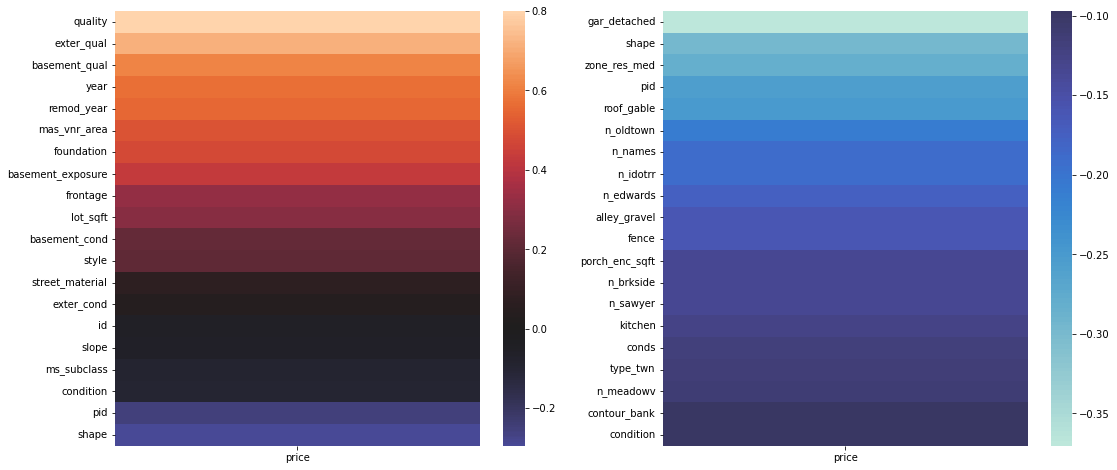

In [7]:
plt.figure(figsize=(18,8))
ax1 = plt.subplot(1, 2, 1)
sns.heatmap(plot_1, center=0)

ax2 = plt.subplot(1, 2, 2)
sns.heatmap(plot_2, center=0);

#### Hold onto some negatively correlated features, but not categorical (yet)

In [8]:
neg_feats = list(model.data.corr()[['price']].sort_values(by='price', ascending=True).index[:20])
neg_feats

['gar_detached',
 'shape',
 'zone_res_med',
 'pid',
 'roof_gable',
 'n_oldtown',
 'n_names',
 'n_idotrr',
 'n_edwards',
 'alley_gravel',
 'fence',
 'porch_enc_sqft',
 'n_brkside',
 'n_sawyer',
 'kitchen',
 'conds',
 'type_twn',
 'n_meadowv',
 'contour_bank',
 'condition']

In [9]:
neg_feats = ['shape', 'fence', 'kitchen', 'conds', 'condition']

#### Grab the largest positively correlation features for feature exploration

In [10]:
test_cats = list(model.data.corr().sort_values(by=['price'], ascending=False)['price'][0:30].index)

In [11]:
test_cats.remove('price')       # target
test_cats.remove('price_log')   # target
test_cats.remove('p_sqft')      # eda only
test_cats.remove('n_nridght')   # categorical
len(test_cats)


26

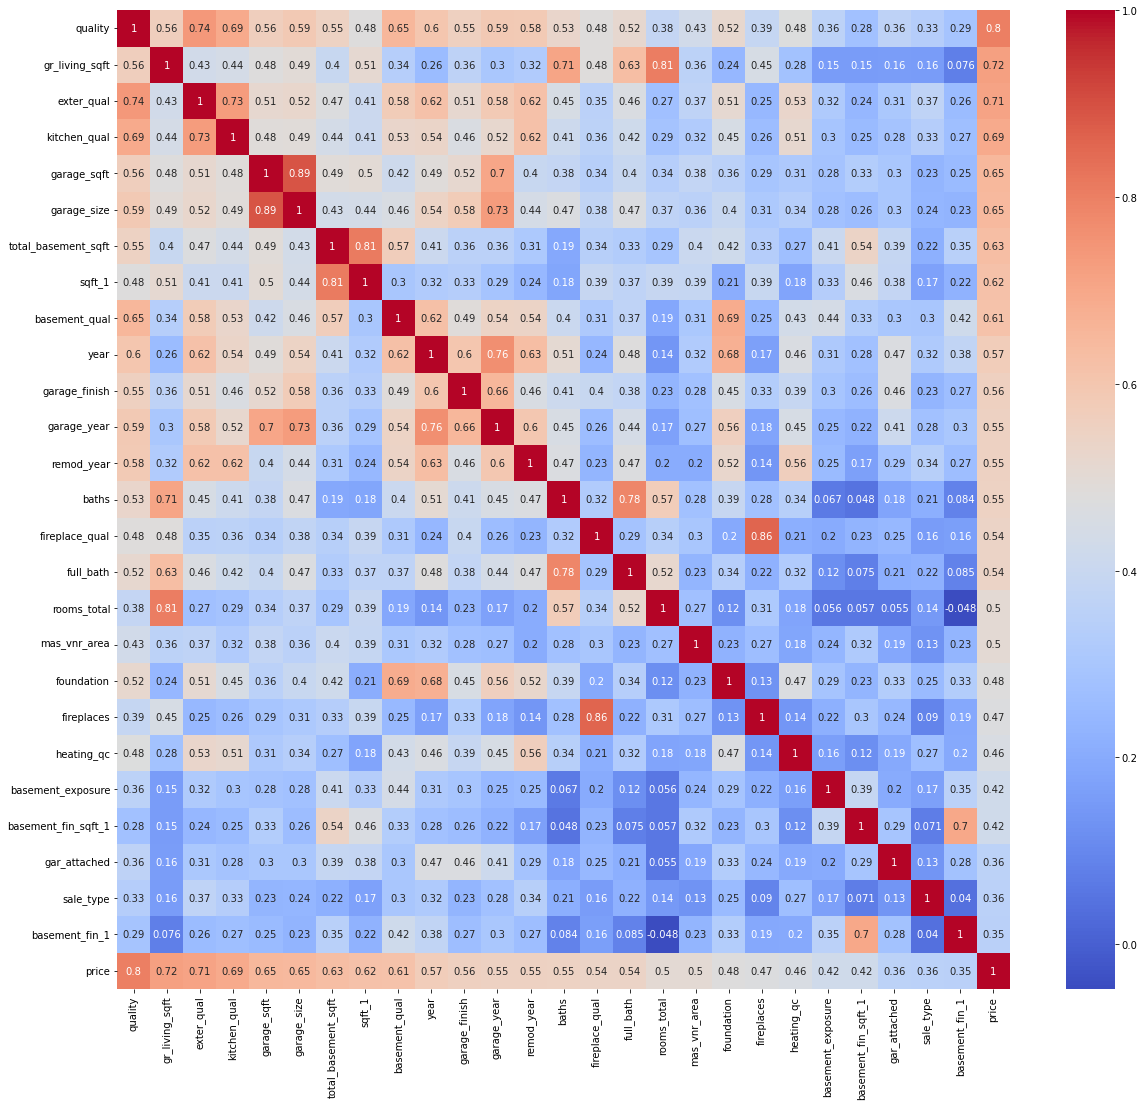

In [12]:
plt.figure(figsize=(20,18))
sns.heatmap(model.data[test_cats + ['price']].corr(), annot=True, cmap='coolwarm');

#### Good to see some blue between our features. Ideally we will have positive correlation between to our price feature. However, since we're talking about features of a house, many of our features will have covariance.

#### Examine target

1.5575514385863427


<AxesSubplot:>

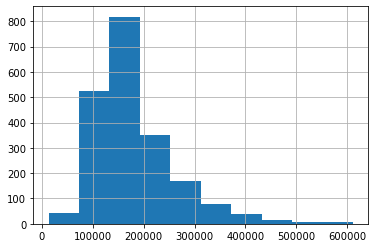

In [13]:
print(model.data['price'].skew())
model.data['price'].hist()

#### Sale price data is heavily right skewed

-0.14681576272177396


<AxesSubplot:>

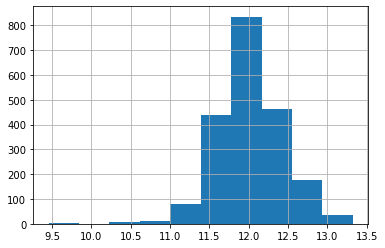

In [14]:
print(model.data['price_log'].skew())
model.data['price_log'].hist()

##### The log of final sale price is more normally distributed with a skew of only -0.14 compared to +1.56. Should see better results fitting data to the log price.
#
#

### Feature testing

#### RMSE & R2 will be used as the evaluation metrics throughout the project. Both metrics will be calculated on the train set and test set. As always, the objective is to minimize RMSE and maximize R2. Ideally, the train & test set will return similar scores for both metrics.

##### Plan is to throw as many feature combindations against the wall and see which ones stick.

In [15]:
feats_1 = ['quality', 'gr_living_sqft', 'sale_type', 'garage_sqft', 'total_basement_sqft', 'baths', 'year', 'rooms_total', 'mas_vnr_area', 'foundation', 'heating_qc', 'exter_qual']
feats_1_n = feats_1 + model.cats_neighborhood + model.cats_type

#### Using some model functions from our ModelData class, set above. Quick and easy testing. Mostly for exploration. Baby steps.

In [16]:
model.train_test(feats_1, 'price')
model.run_lasso(scale=True, poly=False)

quality                0
gr_living_sqft         0
sale_type              0
garage_sqft            0
total_basement_sqft    0
baths                  0
year                   0
rooms_total            0
mas_vnr_area           0
foundation             0
heating_qc             0
exter_qual             0
dtype: int64
Data ready for modeling
No Lasso model found, building
Lasso model instantiated
Running lasso model on Index(['quality', 'gr_living_sqft', 'sale_type', 'garage_sqft',
       'total_basement_sqft', 'baths', 'year', 'rooms_total', 'mas_vnr_area',
       'foundation', 'heating_qc', 'exter_qual'],
      dtype='object') 
Alpha of 1.0 applied.
Scaling data
Standard scaler instantiated
Train R2: 0.8112063920075122
Test R2: 0.8337592593268178
Train RMSE: 33362.70549395522
Test RMSE: 32628.04973781762


#### Our null model gave us a RMSE of $79,239 (see null_model.ipynb) .. our basic feature model has a RMSE of $32,62. Errors were reduced by ~$50,000 per prediction. Basic model also explains 83% of the variance in the test split and improvement of 83%. I'm confident we can do significantly better with further feature testing.

In [17]:
model.train_test(feats_1_n, 'price')
model.run_lasso(scale=True, poly=False)

quality                0
gr_living_sqft         0
sale_type              0
garage_sqft            0
total_basement_sqft    0
baths                  0
year                   0
rooms_total            0
mas_vnr_area           0
foundation             0
heating_qc             0
exter_qual             0
n_grnhill              0
n_greens               0
n_blueste              0
n_npkvill              0
n_veenker              0
n_brdale               0
n_blmngtn              0
n_meadowv              0
n_clearcr              0
n_swisu                0
n_stonebr              0
n_timber               0
n_noridge              0
n_idotrr               0
n_crawfor              0
n_brkside              0
n_mitchel              0
n_sawyerw              0
n_nwames               0
n_sawyer               0
n_gilbert              0
n_nridght              0
n_somerst              0
n_edwards              0
n_oldtown              0
n_collgcr              0
n_names                0
type_twn               0


#### Possible improvements when adding in categorical variables. Lets explore more.

In [18]:
feats_2 = ['quality', 'gr_living_sqft', 'bed', 'baths', 'lot_sqft']
feats_2_cats = feats_2 + model.cats_neighborhood + model.cats_type + model.cats_zoning

In [19]:
model.train_test(feats_2, 'price')
model.run_lasso(scale=True, poly=False)

quality           0
gr_living_sqft    0
bed               0
baths             0
lot_sqft          0
dtype: int64
Data ready for modeling
Running lasso model on Index(['quality', 'gr_living_sqft', 'bed', 'baths', 'lot_sqft'], dtype='object') 
Alpha of 1.0 applied.
Scaling data
Standard scaler instantiated
Train R2: 0.744813276509424
Test R2: 0.7815837170167257
Train RMSE: 38787.93476655881
Test RMSE: 37399.421892181184


#### This very simple model did worse than the more complex model. How do categorical variables change the results?

In [20]:
model.train_test(feats_2_cats, 'price')
model.run_lasso(scale=True, poly=False)

quality           0
gr_living_sqft    0
bed               0
baths             0
lot_sqft          0
n_grnhill         0
n_greens          0
n_blueste         0
n_npkvill         0
n_veenker         0
n_brdale          0
n_blmngtn         0
n_meadowv         0
n_clearcr         0
n_swisu           0
n_stonebr         0
n_timber          0
n_noridge         0
n_idotrr          0
n_crawfor         0
n_brkside         0
n_mitchel         0
n_sawyerw         0
n_nwames          0
n_sawyer          0
n_gilbert         0
n_nridght         0
n_somerst         0
n_edwards         0
n_oldtown         0
n_collgcr         0
n_names           0
type_twn          0
type_sf           0
type_twn_end      0
zone_res_hi       0
zone_res_vil      0
zone_res_med      0
zone_res_low      0
dtype: int64
Data ready for modeling
Running lasso model on Index(['quality', 'gr_living_sqft', 'bed', 'baths', 'lot_sqft', 'n_grnhill',
       'n_greens', 'n_blueste', 'n_npkvill', 'n_veenker', 'n_brdale',
       'n_blm

#### Definitely an improvement in our RMSE & R2

#### Lets get REALLY simple

In [21]:
feats_3 = ['quality', 'gr_living_sqft', 'lot_sqft', 'sale_type']
feats_3_cats = feats_3 + model.cats_neighborhood + model.cats_type + model.cats_zoning + model.cats_config

In [22]:
model.train_test(feats_3, 'price')
model.run_lasso(scale=True, poly=False)

quality           0
gr_living_sqft    0
lot_sqft          0
sale_type         0
dtype: int64
Data ready for modeling
Running lasso model on Index(['quality', 'gr_living_sqft', 'lot_sqft', 'sale_type'], dtype='object') 
Alpha of 1.0 applied.
Scaling data
Standard scaler instantiated
Train R2: 0.7418971125928404
Test R2: 0.7779418698231595
Train RMSE: 39008.931099776666
Test RMSE: 37709.92966278251


#### Now, lets add some cat features.

In [23]:
model.train_test(feats_3_cats, 'price')
model.run_lasso(scale=True, poly=False)

quality           0
gr_living_sqft    0
lot_sqft          0
sale_type         0
n_grnhill         0
n_greens          0
n_blueste         0
n_npkvill         0
n_veenker         0
n_brdale          0
n_blmngtn         0
n_meadowv         0
n_clearcr         0
n_swisu           0
n_stonebr         0
n_timber          0
n_noridge         0
n_idotrr          0
n_crawfor         0
n_brkside         0
n_mitchel         0
n_sawyerw         0
n_nwames          0
n_sawyer          0
n_gilbert         0
n_nridght         0
n_somerst         0
n_edwards         0
n_oldtown         0
n_collgcr         0
n_names           0
type_twn          0
type_sf           0
type_twn_end      0
zone_res_hi       0
zone_res_vil      0
zone_res_med      0
zone_res_low      0
config_fr_2       0
config_culd       0
config_corner     0
config_inside     0
dtype: int64
Data ready for modeling
Running lasso model on Index(['quality', 'gr_living_sqft', 'lot_sqft', 'sale_type', 'n_grnhill',
       'n_greens', 'n_blue

#### Cats are good

In [24]:
feats_4 = ['gr_living_sqft', 'quality', 'condition', 'exter_qual', 'exter_cond', 'basement_qual', 'basement_cond', 'heating_qc', 'kitchen_qual', 'garage_qual', 'garage_cond']
feats_4_cats = feats_4 + model.cats_neighborhood + model.cats_type

In [25]:
model.train_test(feats_4_cats, 'price')
model.run_lasso(scale=True, poly=False)

gr_living_sqft    0
quality           0
condition         0
exter_qual        0
exter_cond        0
basement_qual     0
basement_cond     0
heating_qc        0
kitchen_qual      0
garage_qual       0
garage_cond       0
n_grnhill         0
n_greens          0
n_blueste         0
n_npkvill         0
n_veenker         0
n_brdale          0
n_blmngtn         0
n_meadowv         0
n_clearcr         0
n_swisu           0
n_stonebr         0
n_timber          0
n_noridge         0
n_idotrr          0
n_crawfor         0
n_brkside         0
n_mitchel         0
n_sawyerw         0
n_nwames          0
n_sawyer          0
n_gilbert         0
n_nridght         0
n_somerst         0
n_edwards         0
n_oldtown         0
n_collgcr         0
n_names           0
type_twn          0
type_sf           0
type_twn_end      0
dtype: int64
Data ready for modeling
Running lasso model on Index(['gr_living_sqft', 'quality', 'condition', 'exter_qual', 'exter_cond',
       'basement_qual', 'basement_cond', 'h

#### A little better. Time to start rapidly exploring and trying various combos from our highly correlated list, generated above.

In [26]:
feats_5 = ['quality', 'gr_living_sqft', 'garage_sqft', 'total_basement_sqft', 'year', 'baths', 'rooms_total', 'lot_sqft']
feats_5_cats = feats_5 + model.cats_neighborhood + model.cats_type + model.cats_config

In [27]:
model.train_test(feats_5_cats, 'price')
model.run_lasso(scale=True, poly=False)

quality                0
gr_living_sqft         0
garage_sqft            0
total_basement_sqft    0
year                   0
baths                  0
rooms_total            0
lot_sqft               0
n_grnhill              0
n_greens               0
n_blueste              0
n_npkvill              0
n_veenker              0
n_brdale               0
n_blmngtn              0
n_meadowv              0
n_clearcr              0
n_swisu                0
n_stonebr              0
n_timber               0
n_noridge              0
n_idotrr               0
n_crawfor              0
n_brkside              0
n_mitchel              0
n_sawyerw              0
n_nwames               0
n_sawyer               0
n_gilbert              0
n_nridght              0
n_somerst              0
n_edwards              0
n_oldtown              0
n_collgcr              0
n_names                0
type_twn               0
type_sf                0
type_twn_end           0
config_fr_2            0
config_culd            0


In [28]:
feats_6 = ['quality', 'gr_living_sqft', 'sale_type', 'garage_sqft', 'total_basement_sqft', 'baths', 'year', 'rooms_total', 'mas_vnr_area', 
'foundation', 'exter_qual', 'basement_qual', 'lot_sqft']
feats_6_cats = feats_6 + model.cats_neighborhood + model.cats_type

In [29]:
model.train_test(feats_6_cats, 'price')
model.run_lasso(scale=True, poly=False)

quality                0
gr_living_sqft         0
sale_type              0
garage_sqft            0
total_basement_sqft    0
baths                  0
year                   0
rooms_total            0
mas_vnr_area           0
foundation             0
exter_qual             0
basement_qual          0
lot_sqft               0
n_grnhill              0
n_greens               0
n_blueste              0
n_npkvill              0
n_veenker              0
n_brdale               0
n_blmngtn              0
n_meadowv              0
n_clearcr              0
n_swisu                0
n_stonebr              0
n_timber               0
n_noridge              0
n_idotrr               0
n_crawfor              0
n_brkside              0
n_mitchel              0
n_sawyerw              0
n_nwames               0
n_sawyer               0
n_gilbert              0
n_nridght              0
n_somerst              0
n_edwards              0
n_oldtown              0
n_collgcr              0
n_names                0


In [30]:
feats_7 = ['quality', 'gr_living_sqft', 'sale_type', 'garage_sqft', 'total_basement_sqft', 'baths', 'year', 'rooms_total', 'mas_vnr_area', 
'foundation', 'exter_qual', 'basement_qual', 'lot_sqft']
feats_7_cats = feats_7 + model.cats_neighborhood + model.cats_type + model.cats_zoning + model.cats_config

In [31]:
model.train_test(feats_7_cats, 'price')
model.run_lasso(scale=True, poly=False)

quality                0
gr_living_sqft         0
sale_type              0
garage_sqft            0
total_basement_sqft    0
baths                  0
year                   0
rooms_total            0
mas_vnr_area           0
foundation             0
exter_qual             0
basement_qual          0
lot_sqft               0
n_grnhill              0
n_greens               0
n_blueste              0
n_npkvill              0
n_veenker              0
n_brdale               0
n_blmngtn              0
n_meadowv              0
n_clearcr              0
n_swisu                0
n_stonebr              0
n_timber               0
n_noridge              0
n_idotrr               0
n_crawfor              0
n_brkside              0
n_mitchel              0
n_sawyerw              0
n_nwames               0
n_sawyer               0
n_gilbert              0
n_nridght              0
n_somerst              0
n_edwards              0
n_oldtown              0
n_collgcr              0
n_names                0


#### Small improvements were made...

#### Not seeing massive improvements in error scores as I tested the above combinations of features. Decided it was time to go to a more automated approach (while fast asleep in bed, this was going to take a while... Results exported to a tab sep txt file. (./datasets/feature_selection_results.txt))

#### Brute force feature selection

In [32]:
def subsets(numbers):
    if numbers == []:
        return [[]]
    x = subsets(numbers[1:])
    return x + [[numbers[0]] + y for y in x]
 
# wrapper function
def subsets_of_given_size(numbers, n):
    return [x for x in subsets(numbers) if len(x)==n]

# Functions borrowed from Geeks for Geeks

numbers = test_cats

ns = list(range(23, 26))    # various size n's features to test

##### **Function source** (https://www.geeksforgeeks.org/python-program-to-get-all-subsets-of-given-size-of-a-set/)

#### Iterate thru categorical variable batches

In [33]:
cat_combos = [
    model.cats_neighborhood + model.cats_type, 
    model.cats_neighborhood + model.cats_type + model.cats_garage, 
    model.cats_neighborhood + model.cats_type + model.cats_garage + model.cats_zoning,
    model.cats_neighborhood + model.cats_type + model.cats_zoning,
    model.cats_neighborhood + model.cats_type + model.cats_garage + model.cats_config,
    model.cats_neighborhood + model.cats_type + model.cats_garage + model.cats_zoning + model.cats_config]

#### Brute force feature selection (overnight only) ... hundreds of models. I am intentially leaving this code commented out. It works, but will take many, many hours to run. The code will brute force every combination for size n features that it receives and log the results to a text file in the datasets directory. Please check out the results of the brute force there. The results of this experiment are further combed through below.

In [34]:
# # iterate thru length n feature subsets
# for n in ns:

#      # generate feature combinations of length n
#      feats_combos = subsets_of_given_size(numbers, n)

#      # iterate thru feature combinations
#      for main_feats in feats_combos:

#           # iterate thru combinations of categorical batches
#           for feats in cat_combos:

#                # combine features with categorical variables
#                feats = feats + main_feats

#                # split data into training & test sets
#                X = model.data[feats]
#                y = model.data['price_log']
#                X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#                # select hyper parameters to test
#                params_r = {'alpha':[250, 500, 1000, 2000]}
#                params_l = {'alpha':[0.1, 0.02, 0.015]}

#                # instatiate estimators
#                ridge = Ridge(random_state=14)
#                lr_poly = Lasso(max_iter=10_000, random_state=14)

#                # instatiate transformers
#                poly = PolynomialFeatures(degree=2, include_bias=False)
#                ss = StandardScaler()

#                # instatiate cross validation for hyper parameter tuning
#                gs_r = GridSearchCV(ridge, params_r, n_jobs=-1)
#                gs_l = GridSearchCV(lr_poly, params_l, n_jobs=-1)

#                # generate polynomial feature combinations
#                X_train_poly = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names_out(), index=X_train.index)
#                X_test_poly = pd.DataFrame(poly.transform(X_test), columns=poly.get_feature_names_out(), index=X_test.index)

#                # scale data
#                X_train_scaled = pd.DataFrame(ss.fit_transform(X_train_poly), columns=X_train_poly.columns, index=X_train.index)
#                X_test_scaled = pd.DataFrame(ss.transform(X_test_poly), columns=X_test_poly.columns, index=X_test.index)

#                # train models
#                gs_l.fit(X_train_scaled, y_train)
#                gs_r.fit(X_train_scaled, y_train)

#                # predict SalePrice
#                y_pred = pd.DataFrame(gs_l.predict(X_test_scaled), columns=['preds'], index=X_test.index)
#                y_pred_r = pd.DataFrame(gs_r.predict(X_test_scaled), columns=['preds_r'], index=X_test.index)

#                # Score and log Lasso model predictions
#                lasso_train_r2 = gs_l.score(X_train_scaled, y_train)
#                lasso_test_r2 = gs_l.score(X_test_scaled, y_test)
#                lasso_train_rmse = round(mean_squared_error(np.exp(y_train), np.exp(gs_l.predict(X_train_scaled)), squared=False), 0)
#                lasso_test_rmse = round(mean_squared_error(np.exp(y_test), np.exp(y_pred), squared=False), 0)

#                print(f'Lasso Best Est: {gs_l.best_estimator_}')
#                print(f'Lasso Train R2: {lasso_train_r2}')
#                print(f'Lasso Test R2: {lasso_test_r2}')
#                print(f'Lasso Train RMSE: {lasso_train_rmse}')
#                print(f'Lasso Test RMSE: {lasso_test_rmse}')

#                # Score and log Ridge model predictions
#                # R2
#                ridge_train_r2 = gs_r.score(X_train_scaled, y_train)
#                ridge_test_r2 = gs_r.score(X_test_scaled, y_test)
#                # RMSE
#                ridge_train_rmse = round(mean_squared_error(np.exp(y_train), np.exp(gs_r.predict(X_train_scaled)), squared=False), 0)
#                ridge_test_rmse = round(mean_squared_error(np.exp(y_test), np.exp(y_pred_r), squared=False), 0)

#                print(f'Ridge Best Est: {gs_r.best_estimator_}')
#                print(f'Ridge Train R2: {ridge_train_r2}')
#                print(f'Ridge Test R2: {ridge_test_r2}')
#                print(f'Ridge Train RMSE: {ridge_train_rmse}')
#                print(f'Ridge Test RMSE: {ridge_test_rmse}')
               
#                # Log results and export to .csv for final feature selection
#                # View results_new as tab separated text doc (best viewed in excel)
#                results = pd.DataFrame({'lasso_train_r2': lasso_train_r2,
#                     'lasso_test_r2': lasso_test_r2,
#                     'lasso_train_rmse': lasso_train_rmse,
#                     'lasso_test_rmse': lasso_test_rmse,
#                     'lasso_alpha': gs_l.best_params_['alpha'],
#                     'ridge_train_r2': ridge_train_r2,
#                     'ridge_test_r2': ridge_test_r2,
#                     'ridge_train_rmse': ridge_train_rmse,
#                     'ridge_test_rmse': ridge_test_rmse,
#                     'ridge_alpha': gs_r.best_params_['alpha'],
#                     'features':[feats]}, index=[0])
               
#                # Export
#                results.to_csv('./datasets/feature_selection_results.txt', sep='\t', mode='a', index=False, header=False)


#### Made the above into a function to quickly test feature combinations. Wanted to have it separate so I could make minor adjustments and tweaks while maintaining consistency for my batch testing. Results still append to the same location for storage and comparison.

In [35]:
def fit_models(feats, target, data=model.data):
     
     # split data into training & test sets
     X = data[feats]
     y = data[target]
     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

     # select hyper parameters to test
     params_r = {'alpha':[250, 500, 1000, 2000]}
     params_l = {'alpha':[0.1, 0.02, 0.015]}

     # instatiate estimators
     ridge = Ridge(random_state=14)
     lr_poly = Lasso(max_iter=10_000, random_state=14)

     # instatiate transformers
     poly = PolynomialFeatures(degree=2, include_bias=False)
     ss = StandardScaler()

     # instatiate cross validation for hyper parameter tuning
     gs_r = GridSearchCV(ridge, params_r, n_jobs=-1)
     gs_l = GridSearchCV(lr_poly, params_l, n_jobs=-1)

     # generate polynomial feature combinations
     X_train_poly = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names_out(), index=X_train.index)
     X_test_poly = pd.DataFrame(poly.transform(X_test), columns=poly.get_feature_names_out(), index=X_test.index)

     # scale data
     X_train_scaled = pd.DataFrame(ss.fit_transform(X_train_poly), columns=X_train_poly.columns, index=X_train.index)
     X_test_scaled = pd.DataFrame(ss.transform(X_test_poly), columns=X_test_poly.columns, index=X_test.index)

     # train models
     gs_l.fit(X_train_scaled, y_train)
     gs_r.fit(X_train_scaled, y_train)

     # predict SalePrice
     y_pred = pd.DataFrame(gs_l.predict(X_test_scaled), columns=['preds'], index=X_test.index)
     y_pred_r = pd.DataFrame(gs_r.predict(X_test_scaled), columns=['preds_r'], index=X_test.index)

     # Score and log Lasso model predictions
     lasso_train_r2 = gs_l.score(X_train_scaled, y_train)
     lasso_test_r2 = gs_l.score(X_test_scaled, y_test)
     lasso_train_rmse = round(mean_squared_error(np.exp(y_train), np.exp(gs_l.predict(X_train_scaled)), squared=False), 0)
     lasso_test_rmse = round(mean_squared_error(np.exp(y_test), np.exp(y_pred), squared=False), 0)

     print(f'Lasso Best Est: {gs_l.best_estimator_}')
     print(f'Lasso Train R2: {lasso_train_r2}')
     print(f'Lasso Test R2: {lasso_test_r2}')
     print(f'Lasso Train RMSE: {lasso_train_rmse}')
     print(f'Lasso Test RMSE: {lasso_test_rmse}')

     # Score and log Ridge model predictions
     # R2
     ridge_train_r2 = gs_r.score(X_train_scaled, y_train)
     ridge_test_r2 = gs_r.score(X_test_scaled, y_test)
     # RMSE
     ridge_train_rmse = round(mean_squared_error(np.exp(y_train), np.exp(gs_r.predict(X_train_scaled)), squared=False), 0)
     ridge_test_rmse = round(mean_squared_error(np.exp(y_test), np.exp(y_pred_r), squared=False), 0)

     print(f'Ridge Best Est: {gs_r.best_estimator_}')
     print(f'Ridge Train R2: {ridge_train_r2}')
     print(f'Ridge Test R2: {ridge_test_r2}')
     print(f'Ridge Train RMSE: {ridge_train_rmse}')
     print(f'Ridge Test RMSE: {ridge_test_rmse}')
     
     # Log results and export to .csv for final feature selection
     # View results_new as tab separated text doc (best viewed in excel)
     results = pd.DataFrame({'lasso_train_r2': lasso_train_r2,
          'lasso_test_r2': lasso_test_r2,
          'lasso_train_rmse': lasso_train_rmse,
          'lasso_test_rmse': lasso_test_rmse,
          'lasso_alpha': gs_l.best_params_['alpha'],
          'ridge_train_r2': ridge_train_r2,
          'ridge_test_r2': ridge_test_r2,
          'ridge_train_rmse': ridge_train_rmse,
          'ridge_test_rmse': ridge_test_rmse,
          'ridge_alpha': gs_r.best_params_['alpha'],
          'features':[feats]}, index=[0])
     
     # Export
     results.to_csv('./datasets/feature_selection_results.txt', sep='\t', mode='a', index=False, header=False)

#### Feature selection gathered from datasets folder in feature_selection_results.txt 

In [36]:
target = 'price_log'
good_feats = ['n_grnhill', 'n_greens', 'n_blueste', 'n_npkvill', 'n_veenker', 'n_brdale', 'n_blmngtn', 'n_meadowv', 'n_clearcr', 'n_swisu', 'n_stonebr', 'n_timber', 'n_noridge', 'n_idotrr', 'n_crawfor', 'n_brkside', 'n_mitchel', 'n_sawyerw', 'n_nwames', 'n_sawyer', 'n_gilbert', 'n_nridght', 'n_somerst', 'n_edwards', 'n_oldtown', 'n_collgcr', 'n_names', 'type_twn', 'type_sf', 'type_twn_end', 'gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport', 'quality', 'gr_living_sqft', 'kitchen_qual', 'garage_sqft', 'garage_size', 'total_basement_sqft', 'sqft_1', 'basement_qual', 'year', 'garage_finish', 'garage_year', 'remod_year', 'baths', 'fireplace_qual', 'full_bath', 'mas_vnr_area', 'foundation', 'fireplaces', 'heating_qc', 'basement_exposure', 'basement_fin_sqft_1', 'gar_attached', 'sale_type', 'basement_fin_1']

In [37]:
new_feats = good_feats + neg_feats

In [38]:
fit_models(new_feats, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.8989623166824923
Lasso Test R2: 0.8746875778836786
Lasso Train RMSE: 23166.0
Lasso Test RMSE: 23155.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9395105452964138
Ridge Test R2: 0.889994462551919
Ridge Train RMSE: 16988.0
Ridge Test RMSE: 20221.0


#### Our RMSE has improved SIGNIFICANTLY after brute forcing hundreds of feature combinations. We're down to just over $20,000 and are able to explain 89% of the variance in the test split. Worth submitting a few models to the Kaggle comp. Ridge regression also performed better than Lasso, so we will be focusing on Ridge mostly for the competition.

----

### Train features on all the training data

#### Used to test feature options on both ridge and lasso models. I assumed lasso would be more effective than ridge, given the number of poly features that were used, but the error scores proved to be lower, consistently, for ridge. Decided to leave the lasso model commented out, but the best models were built from ridge. Will need a lot of regularization due to poly features and need to remember to transform our price log predictions back into their original form.

In [39]:
# Train on all data
X_train = model.data[new_feats]
y_train = model.data['price_log']

params_r = {'alpha':[250, 500, 1000, 1500]}
params_l = {'alpha':[0.1, 0.02, 0.0175, 0.03]}

ridge = Ridge(random_state=14)
# lr_poly = Lasso(max_iter=10_000, random_state=14)

poly = PolynomialFeatures(degree=2, include_bias=False)
ss = StandardScaler()

gs_r = GridSearchCV(ridge, params_r, n_jobs=-1)
# gs_l = GridSearchCV(lr_poly, params_l, n_jobs=-1)

# transform data
X_train_poly = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names_out(), index=X_train.index)
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train_poly), columns=X_train_poly.columns, index=X_train.index)

# gs_l.fit(X_train_scaled, y_train)
gs_r.fit(X_train_scaled, y_train)


# Lasso
# lasso_train_r2 = gs_l.score(X_train_scaled, y_train)
# lasso_train_rmse = round(mean_squared_error(np.exp(y_train), np.exp(gs_l.predict(X_train_scaled)), squared=False), 0)

# print(f'Lasso Best Est: {gs_l.best_estimator_}')
# print(f'Lasso Train R2: {lasso_train_r2}')
# print(f'Lasso Train RMSE: {lasso_train_rmse}')

# Ridge
ridge_train_r2 = gs_r.score(X_train_scaled, y_train)
ridge_train_rmse = round(mean_squared_error(np.exp(y_train), np.exp(gs_r.predict(X_train_scaled)), squared=False), 0)

print(f'Ridge Best Est: {gs_r.best_estimator_}')
print(f'Ridge Train R2: {ridge_train_r2}')
print(f'Ridge Train RMSE: {ridge_train_rmse}')

Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9333909279730201
Ridge Train RMSE: 17057.0


----

### Curiosity break

##### Explore Year data. An interesting trend started in the 1990's and increased significantly in the early 2000's. Housing production went WAY up all across the United States. As a result, we have many more new homes of a 'high'* quality. Will explore modeling home values segmented by pre and post 1990.

##### The 'Foreclosure Crisis' is presumed to have officially begun in 2007 and was at its worst in 2010. We will also explore the change in price between 2007 & 2010

##### * Housing 'quality' metric on average is high, but the construction quality has since been suggested by many to be of a lower overall quality.

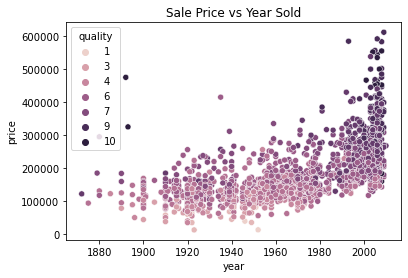

In [40]:
# Price vs Year property was built
plt.title("Sale Price vs Year Sold")
sns.scatterplot(x=model.data['year'], y=model.data['price'], hue=model.data['quality']);

#### Lets categorize it

In [41]:
model.data['modern'] = model.data['year'].apply(lambda x: 1 if x > 2000 else 0)

In [42]:
fit_models(new_feats + ['modern'], 'price_log')

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.8989623177507468
Lasso Test R2: 0.8746875823139166
Lasso Train RMSE: 23166.0
Lasso Test RMSE: 23155.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9399319945547042
Ridge Test R2: 0.8902674744680211
Ridge Train RMSE: 16850.0
Ridge Test RMSE: 20205.0


#### No improvement at all with or scores. The model has already learned when and how to handle the sharp spike in the 90s and the beginning of the crash in the mid 2000s. Cool!!
##### (Not too surprising as we didn't really 'add' any new information to the model. We simply categorized the year sold feature.)

----

### Interesting Note:

#### Ridge regression has been outperforming Lasso regression at almost every step of the way. Will be fosusing more on Ridge for the remainder of the analysis, but will continue to run Lasso, as well. I figured, given the poly transofrmation of features Lasso would perform better than Ridge. Lasso can Eliminate redundant features fairly well, so seeing Ridge suppress the features, but not eliminate, and consistently outperform Lasso is surprising. I have gained an all new respect for Ridge regression through this process.

---

## Back to feature selection

#### Lets test some more features to really tune the results

In [43]:
new_feats_2 = new_feats + model.cats_contour
fit_models(new_feats, target)
print('=' * 50)
fit_models(new_feats_2, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.8989623166824923
Lasso Test R2: 0.8746875778836786
Lasso Train RMSE: 23166.0
Lasso Test RMSE: 23155.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9395105452964138
Ridge Test R2: 0.889994462551919
Ridge Train RMSE: 16988.0
Ridge Test RMSE: 20221.0
Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9002917957268077
Lasso Test R2: 0.8753479717167898
Lasso Train RMSE: 22807.0
Lasso Test RMSE: 22782.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9426588962212841
Ridge Test R2: 0.8906802336252336
Ridge Train RMSE: 16373.0
Ridge Test RMSE: 19916.0


##### Adding lot contour has reduced our RMSE by $300

In [44]:
new_feats_3 = new_feats_2 + model.cats_alley
fit_models(new_feats_2, target)
print('=' * 50)
fit_models(new_feats_3, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9002917957268077
Lasso Test R2: 0.8753479717167898
Lasso Train RMSE: 22807.0
Lasso Test RMSE: 22782.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9426588962212841
Ridge Test R2: 0.8906802336252336
Ridge Train RMSE: 16373.0
Ridge Test RMSE: 19916.0
Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9002917952772111
Lasso Test R2: 0.8753479711979523
Lasso Train RMSE: 22807.0
Lasso Test RMSE: 22782.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9443783901177552
Ridge Test R2: 0.8924125166832899
Ridge Train RMSE: 16208.0
Ridge Test RMSE: 19752.0


##### Adding the alley category has reduced our RMSE by an another $150

In [45]:
new_feats_4 = new_feats_3 + model.cats_zoning
fit_models(new_feats_3, target)
print('=' * 50)
fit_models(new_feats_4, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9002917952772111
Lasso Test R2: 0.8753479711979523
Lasso Train RMSE: 22807.0
Lasso Test RMSE: 22782.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9443783901177552
Ridge Test R2: 0.8924125166832899
Ridge Train RMSE: 16208.0
Ridge Test RMSE: 19752.0
Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9009713552801351
Lasso Test R2: 0.8767910593644005
Lasso Train RMSE: 22801.0
Lasso Test RMSE: 22735.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9475235585987226
Ridge Test R2: 0.8937003074688563
Ridge Train RMSE: 15978.0
Ridge Test RMSE: 19929.0


#### No improvement adding zoning

In [46]:
new_feats_5 = new_feats_3 + model.cats_siding
fit_models(new_feats_3, target)
print('=' * 50)
fit_models(new_feats_5, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9002917952772111
Lasso Test R2: 0.8753479711979523
Lasso Train RMSE: 22807.0
Lasso Test RMSE: 22782.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9443783901177552
Ridge Test R2: 0.8924125166832899
Ridge Train RMSE: 16208.0
Ridge Test RMSE: 19752.0
Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9002917955083138
Lasso Test R2: 0.8753479715811814
Lasso Train RMSE: 22807.0
Lasso Test RMSE: 22782.0
Ridge Best Est: Ridge(alpha=1000, random_state=14)
Ridge Train R2: 0.9380124541581145
Ridge Test R2: 0.8897402971187829
Ridge Train RMSE: 16771.0
Ridge Test RMSE: 20246.0


#### no improvment from adding siding

In [47]:
new_feats_6 = new_feats_3 + model.cats_roof
fit_models(new_feats_3, target)
print('=' * 50)
fit_models(new_feats_6, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9002917952772111
Lasso Test R2: 0.8753479711979523
Lasso Train RMSE: 22807.0
Lasso Test RMSE: 22782.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9443783901177552
Ridge Test R2: 0.8924125166832899
Ridge Train RMSE: 16208.0
Ridge Test RMSE: 19752.0
Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9002917930791262
Lasso Test R2: 0.8753479693616056
Lasso Train RMSE: 22807.0
Lasso Test RMSE: 22782.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9464214502607742
Ridge Test R2: 0.8899856321269317
Ridge Train RMSE: 15842.0
Ridge Test RMSE: 19957.0


#### No improvement adding roof category

In [48]:
new_feats_7 = new_feats_3 + ['street_material', 'low_qual_sqft']
fit_models(new_feats_3, target)
print('=' * 50)
fit_models(new_feats_7, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9002917952772111
Lasso Test R2: 0.8753479711979523
Lasso Train RMSE: 22807.0
Lasso Test RMSE: 22782.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9443783901177552
Ridge Test R2: 0.8924125166832899
Ridge Train RMSE: 16208.0
Ridge Test RMSE: 19752.0
Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9011763453602927
Lasso Test R2: 0.8753370998097258
Lasso Train RMSE: 22764.0
Lasso Test RMSE: 22676.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9455438604861974
Ridge Test R2: 0.8921720266044048
Ridge Train RMSE: 16121.0
Ridge Test RMSE: 19774.0


#### No improvements, but I have a feeling the features matter. Lets hang onto them for now.

In [49]:
new_feats_8 = new_feats_7 + ['lot_sqft']
fit_models(new_feats_7, target)
print('=' * 50)
fit_models(new_feats_8, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9011763453602927
Lasso Test R2: 0.8753370998097258
Lasso Train RMSE: 22764.0
Lasso Test RMSE: 22676.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9455438604861974
Ridge Test R2: 0.8921720266044048
Ridge Train RMSE: 16121.0
Ridge Test RMSE: 19774.0
Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9038125150330707
Lasso Test R2: 0.8779201331012596
Lasso Train RMSE: 22148.0
Lasso Test RMSE: 22596.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9479075736975823
Ridge Test R2: 0.8937302554542077
Ridge Train RMSE: 15630.0
Ridge Test RMSE: 19629.0


#### Lot sqft reduced our error by another $150

In [50]:
new_feats_9 = new_feats_8 + ['electrical']
fit_models(new_feats_8, target)
print('=' * 50)
fit_models(new_feats_9, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9038125150330707
Lasso Test R2: 0.8779201331012596
Lasso Train RMSE: 22148.0
Lasso Test RMSE: 22596.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9479075736975823
Ridge Test R2: 0.8937302554542077
Ridge Train RMSE: 15630.0
Ridge Test RMSE: 19629.0
Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9038120568304342
Lasso Test R2: 0.8773921931486646
Lasso Train RMSE: 22154.0
Lasso Test RMSE: 22537.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9481616364507125
Ridge Test R2: 0.8936062543969142
Ridge Train RMSE: 15622.0
Ridge Test RMSE: 19586.0


#### Small improvement from adding electrical.. will continue to test more

In [51]:
new_feats_10 = new_feats_9 + ['heating', 'basement_fin_2']
fit_models(new_feats_9, target)
print('=' * 50)
fit_models(new_feats_10, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9038120568304342
Lasso Test R2: 0.8773921931486646
Lasso Train RMSE: 22154.0
Lasso Test RMSE: 22537.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9481616364507125
Ridge Test R2: 0.8936062543969142
Ridge Train RMSE: 15622.0
Ridge Test RMSE: 19586.0
Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9051682653499371
Lasso Test R2: 0.8754033721097474
Lasso Train RMSE: 22227.0
Lasso Test RMSE: 22750.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9503524483350566
Ridge Test R2: 0.8922656590086142
Ridge Train RMSE: 15388.0
Ridge Test RMSE: 19481.0


#### heating and partial finished basement sqft reduced our error by $100

#### Find features that haven't been tested enough

In [52]:
set(model.data.columns).difference(set(new_feats_10 + model.cats_zoning + model.cats_siding + model.cats_roof +
                                       model.cats_config + ['ac', 'basement_bath', 'basement_cond', 'slope', 
                                       'misc_sqft', 'pid', 'id', 'bed', 'price', 'price_log', 'p_sqft', 'pool_sqft',
                                       'rooms_total', 'sqft_2', 'ms_subclass', 'frontage', 'pool_qc', 'porch_enc_sqft',
                                       'style', ]))

{'basement_fin_sqft_2',
 'basement_half_bath',
 'basement_unfin_sqft',
 'deck_wood_sqft',
 'exter_cond',
 'exter_qual',
 'functional',
 'garage_cond',
 'garage_qual',
 'half_bath',
 'modern',
 'paved_drive',
 'porch_3_ssn',
 'porch_screened',
 'porch_sqft',
 'sold_month',
 'sold_year',
 'sold_year_mo'}

In [53]:
new_feats_11 = new_feats_10 + ['sold_year_mo', 'basement_fin_sqft_2']
fit_models(new_feats_10, target)
print('=' * 50)
fit_models(new_feats_11, target)

Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9051682653499371
Lasso Test R2: 0.8754033721097474
Lasso Train RMSE: 22227.0
Lasso Test RMSE: 22750.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9503524483350566
Ridge Test R2: 0.8922656590086142
Ridge Train RMSE: 15388.0
Ridge Test RMSE: 19481.0
Lasso Best Est: Lasso(alpha=0.015, max_iter=10000, random_state=14)
Lasso Train R2: 0.9051682653499943
Lasso Test R2: 0.8754033721096477
Lasso Train RMSE: 22227.0
Lasso Test RMSE: 22750.0
Ridge Best Est: Ridge(alpha=500, random_state=14)
Ridge Train R2: 0.9513595288218051
Ridge Test R2: 0.8937625241122391
Ridge Train RMSE: 15245.0
Ridge Test RMSE: 19298.0


#### A healthy improvement in our RMSE with the addition of when the property was sold and basement finished sqft!! Basement condition is clearly very important to the people of Ames. Will hold onto this nugget of information

#### Will submit more numbers to Kaggle using 'new_feats_11' .. they are VERY strong (woohooo, sitting in first place, hope it holds (:  .. you never know)

Also, it should be noted, the Train & Test RMSE scores a little further apart than I would normally like. However, when submitting test scores the model appears to be generalizing nicely. The Test RMSE is almost identical (~$300) to the scores returned. This leads me to believe the model is generalizing well enough to be practically used.

----

#### Model submission features, only

In [54]:
new_feats_12 = ['n_grnhill', 'n_greens', 'n_blueste', 'n_npkvill', 'n_veenker', 'n_brdale', 'n_blmngtn', 'n_meadowv', 'n_clearcr', 'n_swisu', 'n_stonebr', 'n_timber', 
'n_noridge', 'n_idotrr', 'n_crawfor', 'n_brkside', 'n_mitchel', 'n_sawyerw', 'n_nwames', 'n_sawyer', 'n_gilbert', 'n_nridght', 'n_somerst', 'n_edwards', 'n_oldtown', 
'n_collgcr', 'n_names', 'type_twn', 'type_sf', 'type_twn_end', 'gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport', 'quality', 
'gr_living_sqft', 'kitchen_qual', 'garage_sqft', 'garage_size', 'total_basement_sqft', 'sqft_1', 'basement_qual', 'year', 'garage_finish', 'garage_year', 'remod_year', 
'baths', 'fireplace_qual', 'full_bath', 'mas_vnr_area', 'foundation', 'fireplaces', 'heating_qc', 'basement_exposure', 'basement_fin_sqft_1', 'gar_attached', 'sale_type', 
'basement_fin_1', 'shape', 'fence', 'kitchen', 'conds', 'condition', 'contour_hill', 'contour_bank', 'contour_level', 'alley_gravel', 'alley_pave', 'street_material', 
'low_qual_sqft', 'lot_sqft', 'electrical', 'heating', 'basement_fin_2', 'sold_year_mo', 'basement_fin_sqft_2']

new_feats_13 = ['n_grnhill', 'n_greens', 'n_blueste', 'n_npkvill', 'n_veenker', 'n_brdale', 'n_blmngtn', 'n_meadowv', 'n_clearcr', 'n_swisu', 'n_stonebr', 'n_timber', 
'n_noridge', 'n_idotrr', 'n_crawfor', 'n_brkside', 'n_mitchel', 'n_sawyerw', 'n_nwames', 'n_sawyer', 'n_gilbert', 'n_nridght', 'n_somerst', 'n_edwards', 'n_oldtown', 
'n_collgcr', 'n_names', 'type_twn', 'type_sf', 'type_twn_end', 'gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport', 'quality', 
'gr_living_sqft', 'kitchen_qual', 'garage_sqft', 'garage_size', 'total_basement_sqft', 'sqft_1', 'basement_qual', 'year', 'garage_finish', 'garage_year', 'remod_year', 
'baths', 'fireplace_qual', 'full_bath', 'mas_vnr_area', 'foundation', 'fireplaces', 'heating_qc', 'basement_exposure', 'basement_fin_sqft_1', 'gar_attached', 'sale_type', 
'basement_fin_1', 'shape', 'fence', 'kitchen', 'conds', 'condition', 'contour_hill', 'contour_bank', 'contour_level', 'alley_gravel', 'alley_pave', 'street_material', 
'low_qual_sqft', 'lot_sqft', 'electrical', 'heating', 'basement_fin_2']

new_feats_14 = ['n_grnhill', 'n_greens', 'n_blueste', 'n_npkvill', 'n_veenker', 'n_brdale', 'n_blmngtn', 'n_meadowv', 'n_clearcr', 'n_swisu', 'n_stonebr', 'n_timber', 
'n_noridge', 'n_idotrr', 'n_crawfor', 'n_brkside', 'n_mitchel', 'n_sawyerw', 'n_nwames', 'n_sawyer', 'n_gilbert', 'n_nridght', 'n_somerst', 'n_edwards', 'n_oldtown', 'n_collgcr', 
'n_names', 'type_twn', 'type_sf', 'type_twn_end', 'gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport', 'quality', 'gr_living_sqft', 
'kitchen_qual', 'garage_sqft', 'garage_size', 'total_basement_sqft', 'sqft_1', 'basement_qual', 'year', 'garage_finish', 'garage_year', 'remod_year', 'baths', 'fireplace_qual', 
'full_bath', 'mas_vnr_area', 'foundation', 'fireplaces', 'heating_qc', 'basement_exposure', 'basement_fin_sqft_1', 'gar_attached', 'sale_type', 'basement_fin_1', 'shape', 'fence', 
'kitchen', 'conds', 'condition', 'contour_hill', 'contour_bank', 'contour_level', 'alley_gravel', 'alley_pave', 'street_material', 'lot_sqft', 'electrical', 'heating', 
'basement_fin_2', 'sold_year_mo', 'basement_fin_sqft_2']

#### Project based around new_feats_11

In [55]:
# Best model:
# Train on all data
X_train = model.data[new_feats_11]  # ended up being the best
y_train = model.data['price_log']

params_r = {'alpha':[250, 500, 600, 700, 750, 800, 850, 900, 950, 1000 ]}

ridge = Ridge(random_state=14)

poly = PolynomialFeatures(degree=2, include_bias=False)
ss = StandardScaler()

gs_r = GridSearchCV(ridge, params_r, n_jobs=-1)

# transform data
X_train_poly = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names_out(), index=X_train.index)
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train_poly), columns=X_train_poly.columns, index=X_train.index)

# train
gs_r.fit(X_train_scaled, y_train)

# score
ridge_train_r2 = gs_r.score(X_train_scaled, y_train)
ridge_train_rmse = round(mean_squared_error(np.exp(y_train), np.exp(gs_r.predict(X_train_scaled)), squared=False), 0)

print(f'Ridge Best Est: {gs_r.best_estimator_}')
print(f'Ridge Train R2: {ridge_train_r2}')
print(f'Ridge Train RMSE: {ridge_train_rmse}')

Ridge Best Est: Ridge(alpha=850, random_state=14)
Ridge Train R2: 0.9401316135119517
Ridge Train RMSE: 16099.0


#### Visualization of Reults

In [56]:
def single_pred(data, features=new_feats_11):
    # currently using new_feats_11
    data = data[features]
    data_poly = pd.DataFrame(poly.transform(data), columns=poly.get_feature_names_out(), index=data.index)
    data_scaled = pd.DataFrame(ss.transform(data_poly), columns=data_poly.columns, index=data.index)

    return np.exp(gs_r.predict(data_scaled))

In [57]:
y_predictions = single_pred(model.data)
y_truth = model.data['price']

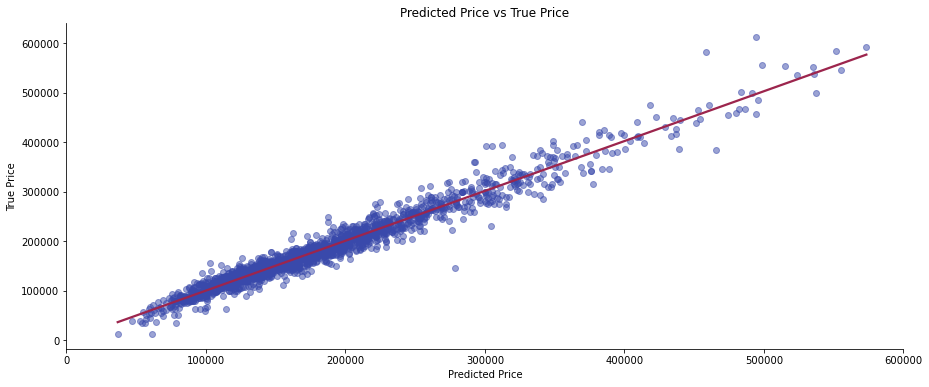

In [58]:
plt.figure(figsize=(15, 6))
sns.regplot(x=y_predictions, y=y_truth, ci=None, scatter_kws={'alpha':0.5}, color='#3949ab', line_kws={'color': '#9c254d'})

plt.xlim(0, 600000)

plt.title("Predicted Price vs True Price")
plt.xlabel('Predicted Price')
plt.ylabel('True Price')
sns.despine();

##### ** model trained on all data and predictions are of the training data, but given the extensive testing during feature selection and the kaggle scores, it is safe to say we are generalizing and are not overfit.

### Submit scores

In [59]:
def predict_testing(predictors, estimator):

    # select predictive columns
    X = model.testing_data[predictors].copy()
    # hold testing id numbers
    X_id = model.testing_data['id'].copy()
    X_id.rename({'id': 'Id'}, axis=1, inplace=True)

    # generate polynomial features (uses the transformers from the model training process above)
    X = pd.DataFrame(poly.transform(X), columns=poly.get_feature_names_out(), index=X.index)
    # scale data (uses the transformers from the model training process above)
    X = pd.DataFrame(ss.transform(X), columns=X.columns, index=X.index)

    # generate predictions
    y_preds = pd.DataFrame(np.exp(estimator.predict(X)), columns=['SalePrice'], index=X.index)
    # merge predictions with id numbers
    y_preds = pd.concat([X_id, y_preds], axis=1)
    
    # export to .csv for submission
    y_preds.to_csv('./submissions/ridge_submit.csv', index=False)

### Export for submission

In [61]:
predict_testing(new_feats_11, gs_r)